In [1]:
!pip install -q kaggle tensorflow scikit-learn matplotlib

In [2]:
from google.colab import files
import os

print("📁 Upload your kaggle.json file:")
files.upload()  # Upload the kaggle.json you downloaded from Kaggle

os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

📁 Upload your kaggle.json file:


Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content/

import zipfile
with zipfile.ZipFile("/content/chest-xray-pneumonia.zip", "r") as zip_ref:
    zip_ref.extractall("/content/")
print("✅ Dataset downloaded and extracted!")

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 98% 2.24G/2.29G [00:27<00:01, 34.7MB/s]
100% 2.29G/2.29G [00:27<00:00, 88.9MB/s]
✅ Dataset downloaded and extracted!


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os

In [5]:
train_dir = "/content/chest_xray/train"
val_dir = "/content/chest_xray/val"
test_dir = "/content/chest_xray/test"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                              batch_size=32, class_mode='binary')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=(150,150),
                                          batch_size=32, class_mode='binary')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150,150),
                                            batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_gen, epochs=5, validation_data=val_gen)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 432ms/step - accuracy: 0.7673 - loss: 0.5131 - val_accuracy: 0.8750 - val_loss: 0.5033
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 421ms/step - accuracy: 0.9149 - loss: 0.2179 - val_accuracy: 0.8750 - val_loss: 0.6181
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 423ms/step - accuracy: 0.9168 - loss: 0.1955 - val_accuracy: 0.7500 - val_loss: 0.4452
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 421ms/step - accuracy: 0.9309 - loss: 0.1752 - val_accuracy: 0.6875 - val_loss: 1.0617
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.9434 - loss: 0.1367 - val_accuracy: 0.7500 - val_loss: 0.7526


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.7890 - loss: 0.5736
✅ Test Accuracy: 78.85%


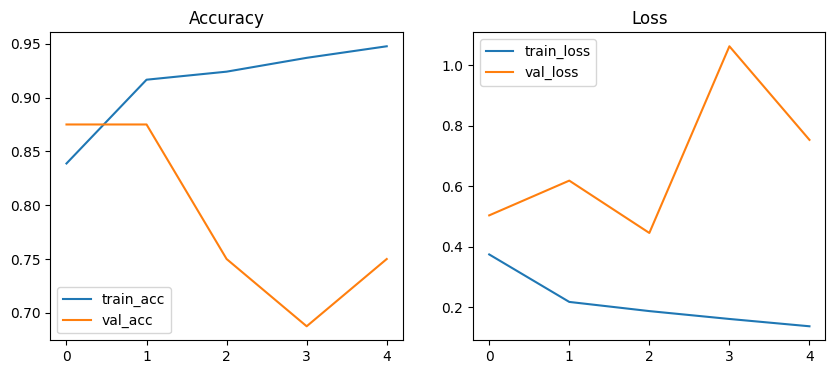

In [10]:
loss, acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title("Loss")
plt.show()

Saving IM-0001-0001.jpeg to IM-0001-0001.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129729 (\N{LUNGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


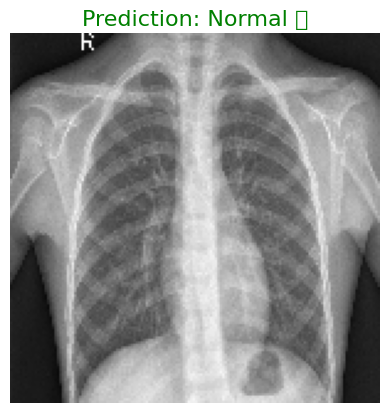

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 📸 Upload your own image
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    # Load and preprocess the image
    img_path = fn
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # Predict
    prediction = model.predict(img_array)

    # Display result
    plt.imshow(img)
    plt.axis('off')
    if prediction[0][0] > 0.5:
        plt.title("Prediction: Pneumonia 😷", color='red', fontsize=16)
    else:
        plt.title("Prediction: Normal 🫁", color='green', fontsize=16)
    plt.show()
